In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [164]:
df = pd.read_csv('loan-train.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [165]:
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [166]:
df.shape

(614, 13)

This dataset contain 614 rows and 13 columns.

In [167]:
print("This dataset contain", df.columns, "columns")

This dataset contain Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') columns


In [168]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

First convert all chatogarical values into numerical values.

In [169]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in that dataset.

In [170]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)

In [171]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [172]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [173]:
df['Gender'].fillna('Male', inplace = True)

In [174]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [175]:
df['Married'].fillna('Yes', inplace = True)

In [176]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [177]:
df['Dependents'].fillna('0', inplace = True)

In [178]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [179]:
df['Self_Employed'].fillna('No', inplace = True)

In [180]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [181]:
df.duplicated().any()

False

There are no duplicate values in that dataset.

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [183]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


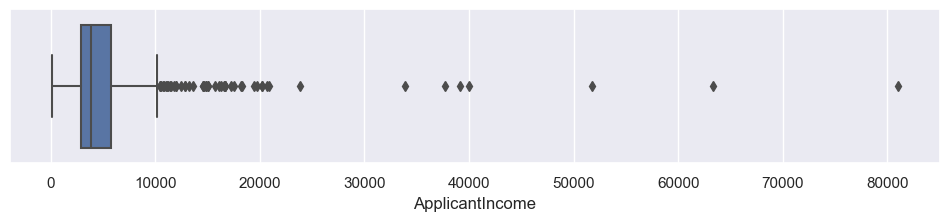

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


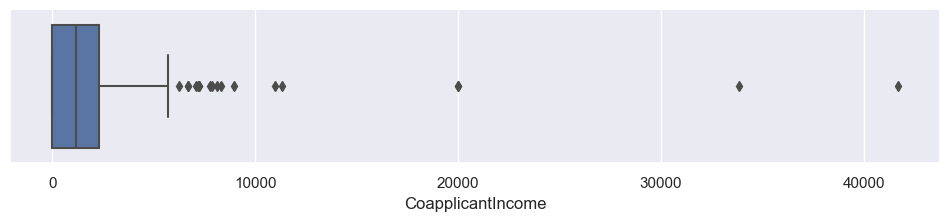

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


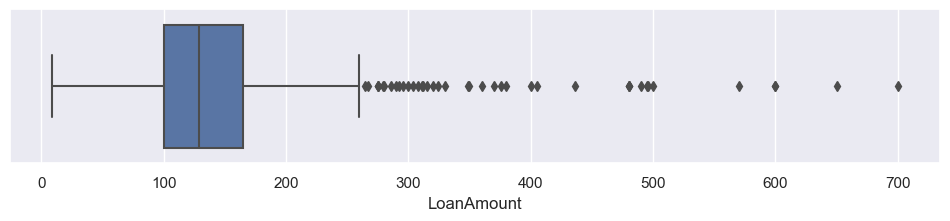

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


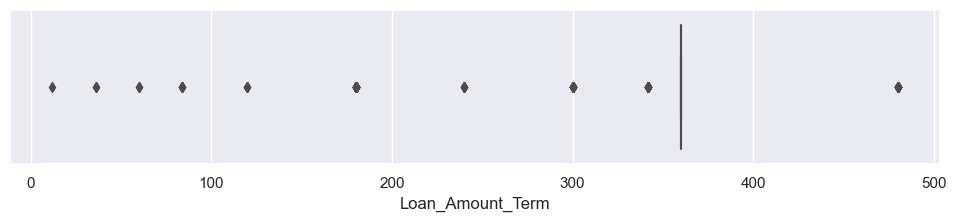

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


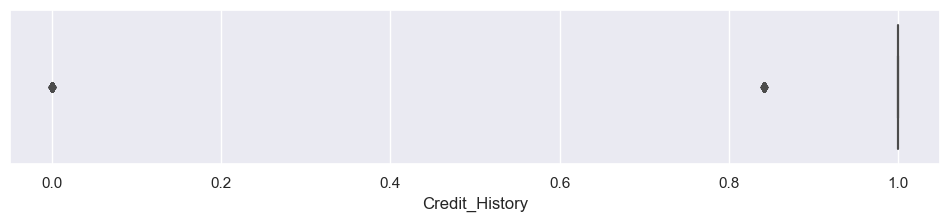

In [88]:
y = df.columns

for x in y:
    if x == "Loan_ID" or x == "Gender" or x == "Married" or x == "Dependents" or x == "Education" or x == "Self_Employed" or x == "Property_Area" or x == "Loan_Status":
        continue
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(df[x])
    plt.show()

There are some outlier values in that dataset.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

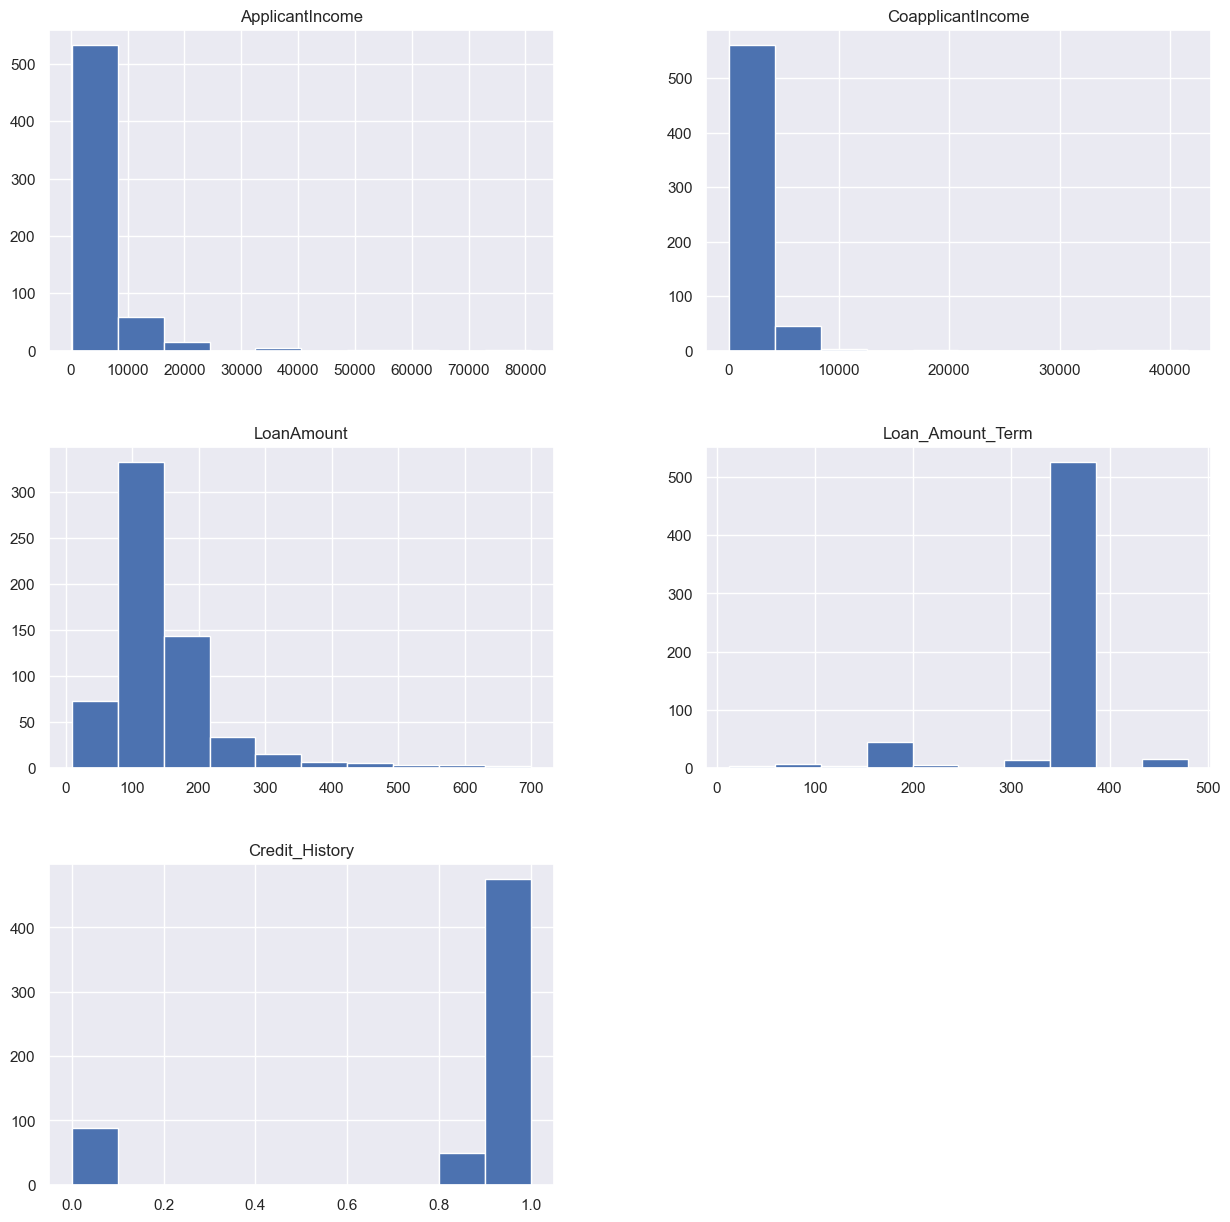

In [89]:
df.hist(figsize = (15, 15))

In [146]:
sns.pairplot(df, height = 15)

In [184]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [185]:
df.replace({'Gender' : {'Male' : 1, 'Female' : 0}}, inplace = True)

In [186]:
df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [187]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [188]:
df.replace({'Married' : {'Yes' : 1, 'No' : 0}}, inplace = True)

In [189]:
df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [190]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [191]:
df.replace({'Dependents' : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}}, inplace = True)

In [192]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [193]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [194]:
df.replace({'Self_Employed' : {'Yes' : 1, 'No' : 0}}, inplace = True)

In [195]:
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [196]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [197]:
df.replace({'Education' : {'Graduate' : 1, 'Not Graduate' : 0}}, inplace = True)

In [198]:
df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [199]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [200]:
df.replace({'Property_Area' : {'Rural' : 0, 'Urban' : 1, 'Semiurban' : 2}}, inplace = True)

In [201]:
df['Property_Area'].value_counts()

2    233
1    202
0    179
Name: Property_Area, dtype: int64

In [202]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [203]:
df.replace({'Loan_Status' : {'N' : 0, 'Y' : 1}}, inplace = True)

In [204]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


No need 'Loan_ID' column.

In [206]:
df.drop(columns = 'Loan_ID', axis = 1, inplace = True)

In [207]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
457,1,1,0,1,0,3708,2569.0,173.0,360.0,1.0,1,0
163,1,1,2,1,0,4167,1447.0,158.0,360.0,1.0,0,1
36,1,1,0,1,0,1828,1330.0,100.0,342.0,0.0,1,0
120,1,1,0,1,0,5667,2667.0,180.0,360.0,1.0,0,1
144,1,1,2,1,0,11757,0.0,187.0,180.0,1.0,1,1


In [213]:
temp = df.drop(columns = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'], axis = 1)

df.drop(columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1, inplace = True)

temp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,146.412162,360.0
1,4583,1508.0,128.000000,360.0
2,3000,0.0,66.000000,360.0
3,2583,2358.0,120.000000,360.0
4,6000,0.0,141.000000,360.0


In [214]:
sc = StandardScaler()
temp = sc.fit_transform(temp)

temp = pd.DataFrame(temp, columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
temp.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,-0.554487,0.000000,0.279851
1,-0.134412,-0.038732,-0.219273,0.279851
2,-0.393747,-0.554487,-0.957641,0.279851
3,-0.462062,0.251980,-0.314547,0.279851
4,0.097728,-0.554487,-0.064454,0.279851


In [215]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,1.0,1,1
1,1,1,1,1,0,1.0,0,0
2,1,1,0,1,1,1.0,1,1
3,1,1,0,0,0,1.0,1,1
4,1,0,0,1,0,1.0,1,1


In [217]:
df['ApplicantIncome'] = temp['ApplicantIncome']
df['CoapplicantIncome'] = temp['CoapplicantIncome']
df['LoanAmount'] = temp['LoanAmount']
df['Loan_Amount_Term'] = temp['Loan_Amount_Term']

df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,1,0,1.0,1,1,0.072991,-0.554487,0.000000,0.279851
1,1,1,1,1,0,1.0,0,0,-0.134412,-0.038732,-0.219273,0.279851
2,1,1,0,1,1,1.0,1,1,-0.393747,-0.554487,-0.957641,0.279851
3,1,1,0,0,0,1.0,1,1,-0.462062,0.251980,-0.314547,0.279851
4,1,0,0,1,0,1.0,1,1,0.097728,-0.554487,-0.064454,0.279851


In [218]:
df.std()

Gender               0.386497
Married              0.476373
Dependents           1.009623
Education            0.413389
Self_Employed        0.340446
Credit_History       0.349681
Property_Area        0.815081
Loan_Status          0.463973
ApplicantIncome      1.000815
CoapplicantIncome    1.000815
LoanAmount           1.000815
Loan_Amount_Term     1.000815
dtype: float64

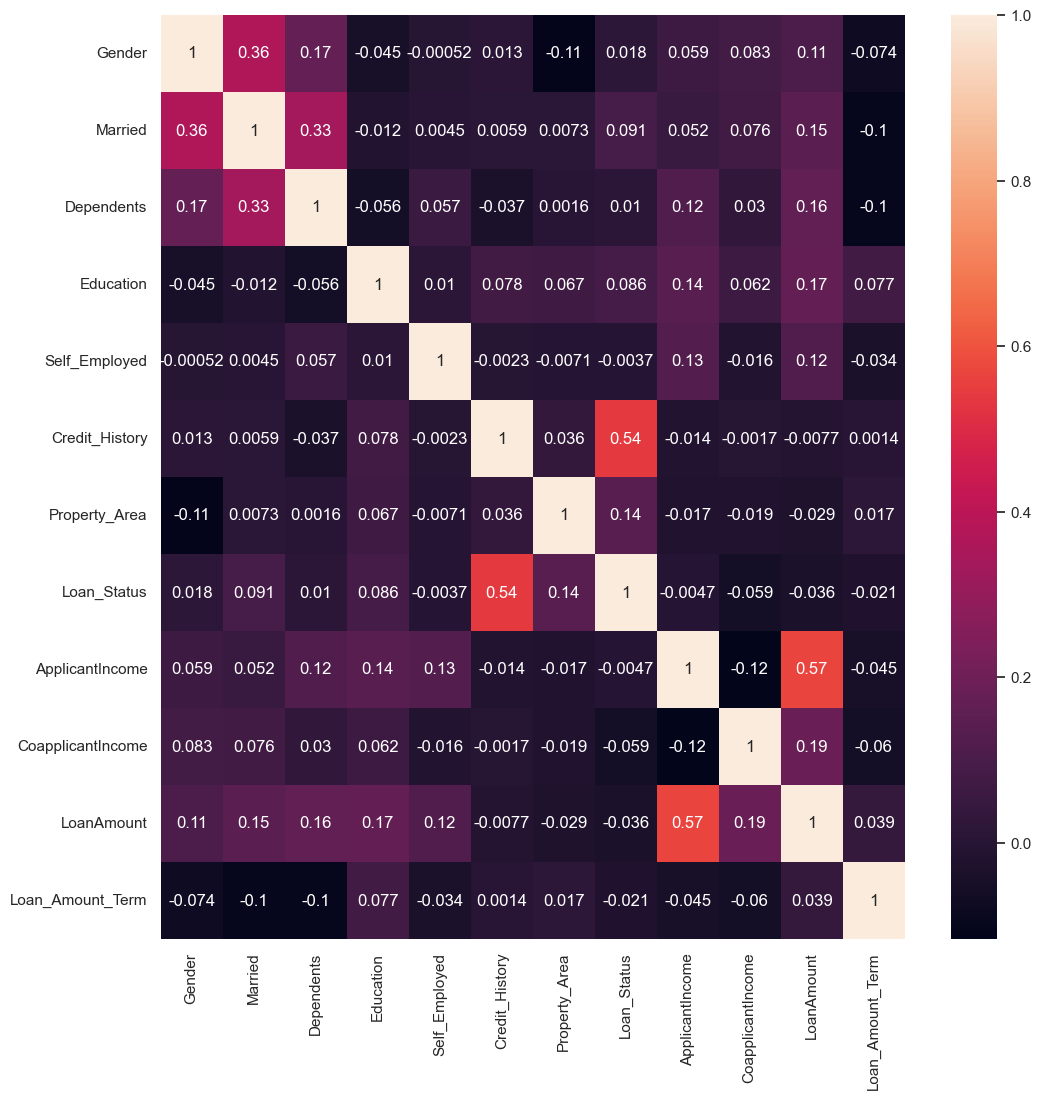

In [222]:
sns.set()
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

There are no highly correlated variables in that dataset.

Now split dataset into x and y.

In [224]:
x = df.drop(columns = 'Loan_Status', axis = 1)
y = df['Loan_Status']

In [225]:
x.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
207,1,0,0,0,0,1.000000,0,-0.234018,0.311148,-1.088642,0.279851
459,1,1,0,1,0,1.000000,2,0.480097,-0.554487,0.161820,0.279851
226,1,1,0,0,1,1.000000,1,-0.109511,-0.554487,-0.100182,0.279851
197,0,0,0,0,0,1.000000,1,-0.572808,0.254374,-0.314547,0.000000
490,1,0,0,0,0,0.842199,2,-0.443059,0.398019,-0.600366,0.279851


In [226]:
y.sample(5)

257    0
464    0
468    1
413    1
444    1
Name: Loan_Status, dtype: int64

Now split data into x_train, x_test, y_train, y_test.

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 5)

In [234]:
print(x_train.shape)
print("x_train has 491 rows and 11 columns")
print(y_train.shape)
print("y_train has 491 rows and 1 column")
print(x_test.shape)
print("x_test has 123 rows and 11 columns")
print(y_test.shape)
print("y_test has 123 rows and 1 column")

(491, 11)
x_train has 491 rows and 11 columns
(491,)
y_train has 491 rows and 1 column
(123, 11)
x_test has 123 rows and 11 columns
(123,)
y_test has 123 rows and 1 column


# Linear Regression Model

In [235]:
lnr = LinearRegression()
lnr.fit(x_train, y_train)

LinearRegression()

In [254]:
lnr_train_data_pre = np.round(lnr.predict(x_train)).astype(int)
lnr_test_data_pre = np.round(lnr.predict(x_test)).astype(int)

lnr_train_data_acc = accuracy_score(y_train, train_data_pre)
lnr_test_data_acc = accuracy_score(y_test, test_data_pre)

print("Accuracy score for train data using linear regression ", lnr_train_data_acc)
print("Accuracy score for test data using linear regression ", lnr_test_data_acc)

Accuracy score for train data using linear regression  0.8167006109979633
Accuracy score for test data using linear regression  0.7967479674796748


# Logistic Regression Model

In [255]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [256]:
lgr_train_data_pre = lgr.predict(x_train)
lgr_test_data_pre = lgr.predict(x_test)

lgr_train_data_acc = accuracy_score(y_train, train_data_pre)
lgr_test_data_acc = accuracy_score(y_test, test_data_pre)

print("Accuracy score for train data using logistic regression ", lgr_train_data_acc)
print("Accuracy score for test data using logistic regression ", lgr_test_data_acc)

Accuracy score for train data using logistic regression  0.8167006109979633
Accuracy score for test data using logistic regression  0.7967479674796748
